In [ ]:
#import the libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt 

In [ ]:
#load the training dataset

df=pd.read_csv('sample_data/mnist_train_small.csv')

In [ ]:
#split df into feature set 'train_X' and label 'train_y'

train_y,train_X=np.hsplit(df,[1])

print(train_y.head())
print(train_X.head())

   6
0  5
1  7
2  9
3  5
4  2
   0  0.1  0.2  0.3  0.4  0.5  ...  0.585  0.586  0.587  0.588  0.589  0.590
0  0    0    0    0    0    0  ...      0      0      0      0      0      0
1  0    0    0    0    0    0  ...      0      0      0      0      0      0
2  0    0    0    0    0    0  ...      0      0      0      0      0      0
3  0    0    0    0    0    0  ...      0      0      0      0      0      0
4  0    0    0    0    0    0  ...      0      0      0      0      0      0

[5 rows x 784 columns]


In [ ]:
#normalize the feature set 'train_X' to get 'train_x'

train_x=train_X.copy()

#get the maximum datapoint in the entire feature set 'train_x'
maximum=train_x.max().max()  
print(maximum)

#divide the entire feature set 'train_x' with 'maximum'
train_x=train_x.div(maximum) 
train_x=train_x.astype('float64')
print (train_x.sample(5))

255
         0  0.1  0.2  0.3  0.4  0.5  ...  0.585  0.586  0.587  0.588  0.589  0.590
10818  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
6263   0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
7545   0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
12826  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
17947  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0

[5 rows x 784 columns]


In [ ]:
#Add the bias column to the feature set 'train_x'

train_x=pd.concat([pd.Series(1.0,index=train_x.index,name='00'),train_x],axis=1)
print(train_x.head())

#'train_x_row' = number of rows in the feature set 'train_x'
train_x_row=train_x.shape[0]
print(train_x_row)

#'train_x_col' = number of columns in the feature set 'train_x'
train_x_col=train_x.shape[1]
print(train_x_col)

    00    0  0.1  0.2  0.3  0.4  ...  0.585  0.586  0.587  0.588  0.589  0.590
0  1.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
1  1.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
2  1.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
3  1.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
4  1.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0

[5 rows x 785 columns]
19999
785


In [ ]:
#convert feature and label dataframes to numpy array

train_x=train_x.to_numpy()
train_y=train_y.to_numpy()

In [ ]:
#define the class for linear regression

class lin_reg:

  @staticmethod

  #define the hypothesis to calculate the expression (theta0*x0 + theta1*x1 + theta2*x2 + .....)

  def hypothesis(train_x,theta):
    hypothesis_output=np.dot(train_x,theta).astype('float64')
    return hypothesis_output

  #define the error (difference between predicted output & actual label)

  def error(pred,train_y):
    delta=np.empty(train_x_row,dtype='float64')
    for i in range(train_x_row):
      delta[i]=pred[i]-train_y[i]
    return delta

  #define the gradient for each attribute in 'train_x' (gradient_i=error_i*train_x_i)
  #alpha=learning rate

  def grad(train_x,delta,alpha):
    grad=((alpha/train_x_col)*np.dot(train_x.T,delta)).astype('float64')
    return grad

  #update the theta values (theta=theta-learning_rate*gradient)

  def update_theta(theta,grad):
    theta=theta-grad
    return theta.astype('float64')

  #define the loss (RMSE)

  def rmse(delta):
    mse=np.square(delta).mean()
    mse=mse.astype('float64')
    rmse_value=sqrt(mse)
    return rmse_value

  #define the training function

  """
  train_x:feature values
  train_y:target values
  theta:weights associated with each attribute
  alpha:Learning rate
  epoch:Number of iterations

  """

  def train(train_x,train_y,theta,alpha,epoch):

    #'rmse_list' contains the RMSE value of the whole feature set 'train_x' after each iteration
    rmse_list=np.empty(epoch,dtype='float64')

    for i in range(epoch):

      #calculate the predicted value using hypothesis function
      pred=lin_reg.hypothesis(train_x,theta)

      #calculate the error between predicted value and target value
      delta=lin_reg.error(pred,train_y) 

      #calculate the gradient
      grad=lin_reg.grad(train_x,delta,alpha)

      #update the theta values
      theta=lin_reg.update_theta(theta,grad)

      #calculate the rmse
      rmse_value=lin_reg.rmse(delta)
      np.append(rmse_list,rmse_value)

    #return the theta values & RMSE values
    return theta,rmse_list


In [ ]:
#initialize theta array with random numbers

np.random.seed(0)
theta=np.random.randn(train_x_col)
theta=theta.astype('float64')

In [ ]:
#call the training function from 'logistic_regression' class to train the dataset
#passing 0.001 as learning rate & 50 as epoch

theta,rmse_list=lin_reg.train(train_x,train_y,theta,0.001,50)

In [ ]:
#display the theta values

print(theta)

[ 2.24322144e+00  4.00157208e-01  9.78737984e-01  2.24089320e+00
  1.86755799e+00 -9.77277880e-01  9.50088418e-01 -1.51357208e-01
 -1.03218852e-01  4.10598502e-01  1.44043571e-01  1.45427351e+00
  7.61037725e-01  1.21658980e-01  4.43516853e-01  3.33327947e-01
  1.49406464e+00 -2.05158264e-01  3.13067702e-01 -8.54095739e-01
 -2.55298982e+00  6.53618595e-01  8.64436199e-01 -7.42165020e-01
  2.26975462e+00 -1.45436567e+00  4.57585173e-02 -1.87183850e-01
  1.53277921e+00  1.46935877e+00  1.54947426e-01  3.78162520e-01
 -8.87785748e-01 -1.98079647e+00 -3.47912149e-01  1.56426028e-01
  1.23053750e+00  1.20356438e+00 -3.86855845e-01 -3.02743390e-01
 -1.04863487e+00 -1.41825009e+00 -1.70659182e+00  1.94882366e+00
 -5.09090945e-01 -4.36626951e-01 -1.25042685e+00  7.80437718e-01
 -1.61182667e+00 -2.11150465e-01 -8.95343171e-01  3.86902498e-01
 -5.10805138e-01 -1.18063218e+00 -2.81822283e-02  4.28331871e-01
  6.65172224e-02  3.02471898e-01 -6.34322094e-01 -3.62741166e-01
 -6.72517639e-01 -3.59264

In [ ]:
#display the RMSE for each iteration on training dataset

for i in range(50):
  print(rmse_list[i])
print(rmse_list.shape)

4.65673859305575e-310
1.784e-321
7.376e-321
1.5e-321
7.26e-321
1.57e-321
7.01e-321
1.64e-321
6.887e-321
1.64e-321
6.616e-321
1.64e-321
6.31e-321
1.275e-321
6.31e-321
9.5e-322
6.31e-321
6.23e-322
6.616e-321
2.57e-322
6.887e-321
2.57e-322
7.01e-321
2.57e-322
7.26e-321
3.26e-322
7.376e-321
3.95e-322
7.376e-321
1.2e-322
7.26e-321
6e-323
7e-321
0.0
6.86e-321
0.0
6.467e-321
0.0
6.01e-321
5.14e-322
6.01e-321
9.5e-322
6.01e-321
1.393e-321
6.47e-321
1.897e-321
6.877e-321
1.897e-321
7.01e-321
1.897e-321
(50,)


(-0.05, 0.05)

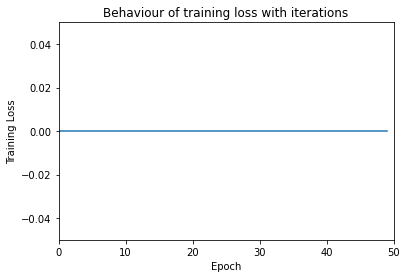

In [ ]:
#plot a graph between loss(RMSE) and number of iterations

epoch=range(50)
plt.plot(epoch,rmse_list)
plt.title('Behaviour of training loss with iterations')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')


In [ ]:
#print predicted values for training dataset

pred_train=linear_regression.hypothesis(train_x,theta)
for i in range(train_x_row):
  print(pred_train[i])

Streaming output truncated to the last 5000 lines.
4.086087808528447
6.515832174212836
-2.1472090197186713
4.785593954521472
3.717868404228639
0.3827899191590638
5.469574168767037
5.5628608835927125
3.545730436233282
2.9825019311670427
10.35762999645478
10.483389408098395
2.9420013393513234
8.553668437050277
9.780187572018948
-2.375941982526437
2.034374055586349
4.356618288352487
4.290297621957627
2.7059301690104887
8.097026058481985
2.6116241627887575
5.663748250911668
2.7376176580906253
3.7789802908980255
4.217143696305872
4.1289502382494465
1.6886573973892116
5.484860312899098
7.157144957732418
0.5736441256923874
7.622786458299412
10.698152064163441
4.702218749227227
11.953012223347159
5.178035854148261
2.673514077732131
8.630785887937016
-0.33519678672351993
1.7675995488818186
7.62362082778035
0.028190267372231653
9.236131261054274
7.134354119506501
9.433573464281407
2.1511682290754557
4.416880217452751
8.637741065469726
4.244015712803949
4.86827586175735
3.477162828193582
7.121907

In [ ]:
#load the test dataset

data=pd.read_csv('sample_data/mnist_test.csv')

In [ ]:
#split 'data' into feature set 'test_X' and label 'test_y'

test_y,test_X=np.hsplit(data,[1])
print(test_y.head())
print(test_X.head())

   7
0  2
1  1
2  0
3  4
4  1
   0  0.1  0.2  0.3  0.4  0.5  ...  0.662  0.663  0.664  0.665  0.666  0.667
0  0    0    0    0    0    0  ...      0      0      0      0      0      0
1  0    0    0    0    0    0  ...      0      0      0      0      0      0
2  0    0    0    0    0    0  ...      0      0      0      0      0      0
3  0    0    0    0    0    0  ...      0      0      0      0      0      0
4  0    0    0    0    0    0  ...      0      0      0      0      0      0

[5 rows x 784 columns]


In [ ]:
#normalize the feature set 'test_X' to get 'test_x'

test_x=test_X.copy()
test_maximum=test_x.max().max()
print(test_maximum)

test_x=test_x.div(test_maximum)
test_x=test_x.astype('float64')
print (test_x.sample(5))

255
        0  0.1  0.2  0.3  0.4  0.5  ...  0.662  0.663  0.664  0.665  0.666  0.667
125   0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
9227  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
3679  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
2238  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
3039  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0

[5 rows x 784 columns]


In [ ]:
#Add the bias column to the feature dataframe 'test_x'

test_x=pd.concat([pd.Series(1.0,index=test_x.index,name='00'),test_x],axis=1)
print(test_x.head())

#'test_x_row' = number of rows in feature set 'test_x'
test_x_row=test_x.shape[0]
print(test_x_row)

#'test_x_col' = number of columns in feature set 'test_x'
test_x_col=test_x.shape[1]
print(test_x_col)

    00    0  0.1  0.2  0.3  0.4  ...  0.662  0.663  0.664  0.665  0.666  0.667
0  1.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
1  1.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
2  1.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
3  1.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
4  1.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0

[5 rows x 785 columns]
9999
785


In [ ]:
#convert the dataframes into numpy arrays

test_y=test_y.to_numpy()
test_x=test_x.to_numpy()

In [ ]:
#predict outputs of test data using the obtained weights(theta values)

pred_test=linear_regression.hypothesis(test_x,theta.T)
for i in range(test_x_row):
  print(pred_test[i])

Streaming output truncated to the last 5000 lines.
-2.500396412481922
5.443204647444913
3.5461701373110137
7.895187601730411
7.730372253681118
-0.3038154784614283
-1.316632815885274
-5.598046788510225
0.2089912513762265
3.4973822932190464
5.342771800926068
12.594792240059894
6.066104225112687
4.4332157972208535
-2.481394687333273
3.820116467447929
7.0075602961819845
-1.507891686203537
1.7503143655122175
0.1321524916195821
6.300819896199974
4.7118302103121446
4.1515186977074165
5.43445858565055
-1.726732247987404
3.604701339956324
3.1787832348619203
6.249746508451833
7.083861198379724
6.03610397644152
-5.034067041654134
-4.001051587978294
3.1474140710375758
-1.0467692984413612
1.0400207374669495
2.307668240576874
-0.23735227481789195
0.921074815681364
1.8558553829602518
7.604408948454961
2.890931547191575
5.957471784701305
4.196380532331995
4.465093060864529
-2.6055812650875168
-5.669803231496975
4.3352839635375595
12.783729569015017
4.1508178867250525
2.6128500412031315
8.6080605172469

In [ ]:
#calculate the loss (RMSE) on test dataset

test_delta=np.empty(test_x_row,dtype='float64')
for i in range(test_x_row):
  test_delta[i]=pred_test[i]-test_y[i]
test_mse=np.square(test_delta).mean()
test_rmse_value=sqrt(test_mse)
print(test_rmse_value)

3.813928279136581
